## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import phrases
import nltk.data
from nltk.corpus import stopwords
import os, string, re
import datetime
import warnings

warnings.filterwarnings('ignore')
np.random.seed(123)

In [2]:
# i=1
# selection_index = {}
# for pres in sorted(list(os.listdir('Corpus of Presidential Speeches/')))[1:]:
#     if (pres == 'hclinton') or (pres == 'trump'):
#         pass
#     else:
#         print(f'{i}:\t{pres.title()}')
#         selection_index[i] = pres
#         i += 1
    
# selections = [input('\nEnter the number of the first president/candidate you would like to compare:')]
# selections.append(input('Enter the number of the second president/candidate you would like to compare:'))
# selections = [selection_index[int(selections[0])], selection_index[int(selections[1])]]
# selections

In [3]:
selections = ['trump', 'hclinton']
t0 = datetime.datetime.now()
lvl1 = 'Corpus of Presidential Speeches/'

speech_dict = {'president': [], 'name': [], 'text': []}
labels_index = {}
speech_count = {}

i=0
for folder in os.listdir(lvl1):
    if folder in selections:
        labels_index[i] = folder.lower()
        speech_count[folder] = [0]
        
        for file in os.listdir(lvl1 + folder):
            speech_count[folder][0] += 1
            
            with open(f'{lvl1}{folder}/{file}', 'r') as f:
                data = f.read()
                
                # Remove tags for date, title, etc. & punctuation
                no_tags = re.sub('<[^>]+>', '', data)
                paragraphs = no_tags.translate(str.maketrans('', '', string.punctuation))
                
                # Turn data into list of lower-case words
                words = paragraphs.split()
                words = [x.strip().lower() for x in words] 
#                 words = [word.lower() for word in words if word]
                
                # Every 1000 words treated as paragraph; remove stop words
                n = len(words) // 250
                for j in range(n):
                    text = words[j*250:(j+1)*250]
                    speech_dict['text'].append([word for word in text])
                    speech_dict['president'].append(i)
                    speech_dict['name'].append(folder.title())
                    
                text = words[n*250:]
                speech_dict['text'].append([word for word in text])
                speech_dict['president'].append(i)
                speech_dict['name'].append(folder.title())
        i+=1
                
df = pd.DataFrame.from_dict(speech_dict)
df['length'] = df['text'].apply(lambda x: len(x))
df = df[df['length'] >= 25]
num_classes = len(df['president'].unique())
print(df.shape)
print(labels_index)
df.head()

(2206, 4)
{0: 'hclinton', 1: 'trump'}


,president,name,text,length
0,0,Hclinton,"[hello, philadelphia, oh, thank, you, i, am, s...",250
1,0,Hclinton,"[election, a, choice, between, division, or, u...",250
2,0,Hclinton,"[son, captain, khan, was, killed, serving, our...",250
3,0,Hclinton,"[president, obama, said, it, started, right, h...",250
4,0,Hclinton,"[my, opponent, accuses, me, of, playing, the, ...",250


In [4]:
stop_words = set(stopwords.words('english'))

remove_stop = []
for i in range(df.shape[0]):
    words = df.iloc[i]['text']
    words = [word for word in words if word not in stop_words]
    remove_stop.append(words)
    
df['clean_text'] = remove_stop
df.head()

,president,name,text,length,clean_text
0,0,Hclinton,"[hello, philadelphia, oh, thank, you, i, am, s...",250,"[hello, philadelphia, oh, thank, grateful, ton..."
1,0,Hclinton,"[election, a, choice, between, division, or, u...",250,"[election, choice, division, unity, economy, w..."
2,0,Hclinton,"[son, captain, khan, was, killed, serving, our...",250,"[son, captain, khan, killed, serving, country,..."
3,0,Hclinton,"[president, obama, said, it, started, right, h...",250,"[president, obama, said, started, right, phila..."
4,0,Hclinton,"[my, opponent, accuses, me, of, playing, the, ...",250,"[opponent, accuses, playing, womens, card, wel..."


In [5]:
df['name'].value_counts()

Trump       1738
Hclinton     468
Name: name, dtype: int64

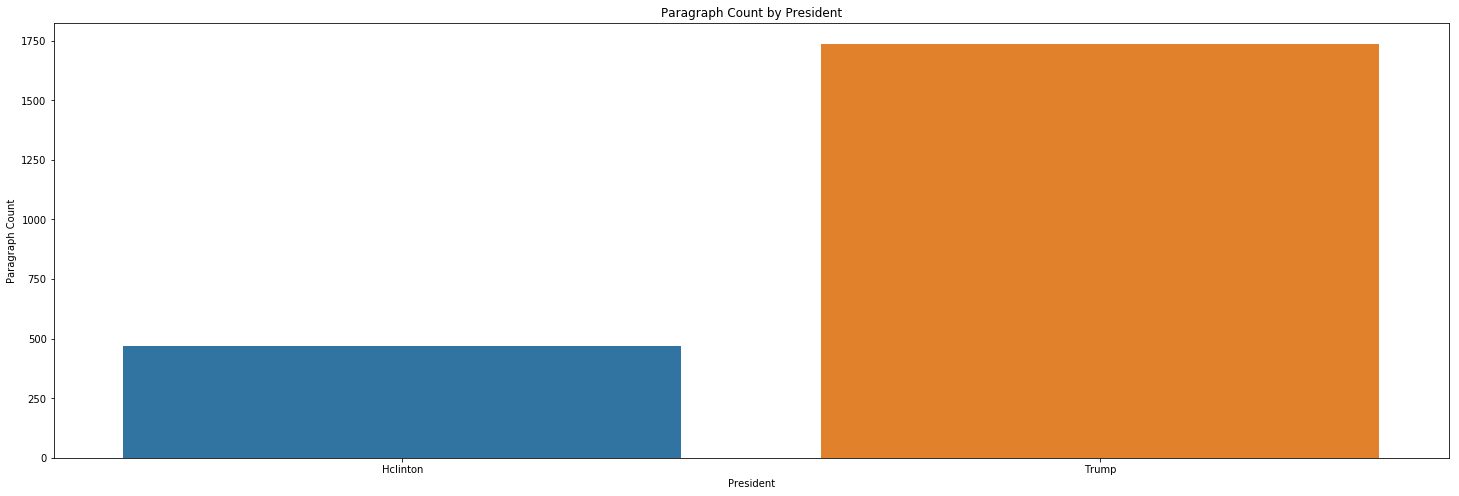

In [6]:
plt.figure(figsize=(25, 8))
sns.countplot('name', data=df)
plt.title(f'Paragraph Count by {df.columns[0].title()}')
plt.ylabel('Paragraph Count')
plt.xlabel(df.columns[0].title())
plt.savefig(f'{selections[0]}_{selections[1]}_paragraph_count.png')
plt.show()

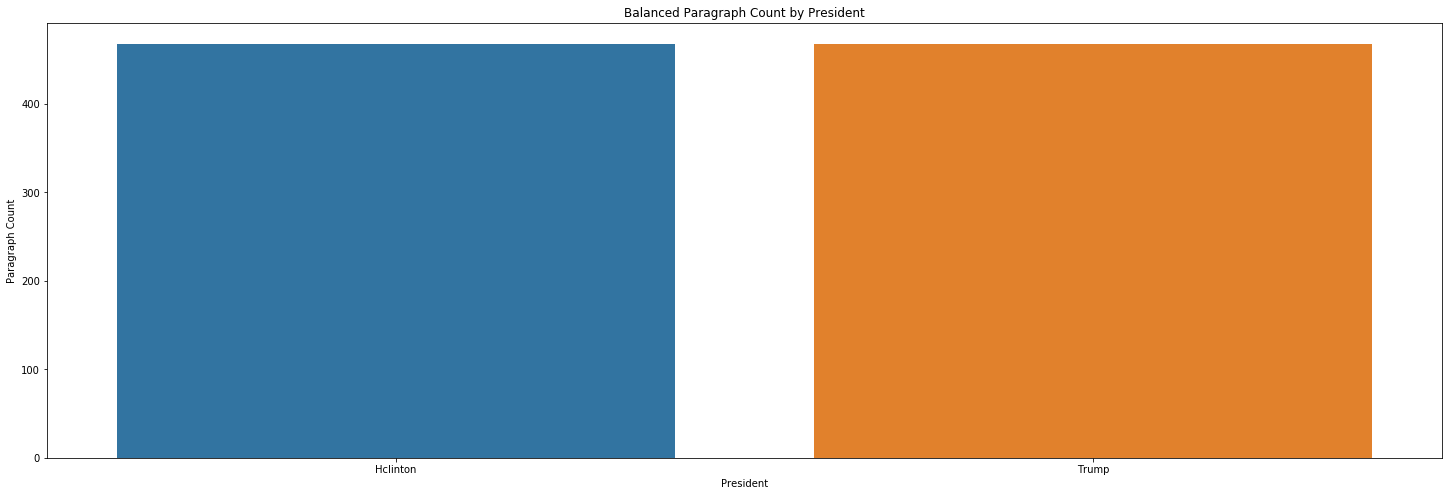

In [7]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Create dictionary to store scaled dataframes for each president.
scaled_dfs = {}

# Set max samples based on president with fewest paragraphs
n = shuffled_df.loc[shuffled_df['name'] == df['name'].value_counts().index[-1]].shape[0]

#Randomly select 492 observations from the non-fraud (majority class)
for name in df['name'].unique():
    scaled_dfs[f'{name}_df'] = shuffled_df.loc[shuffled_df['name'] == name].sample(n=n,random_state=42)

# Concatenate dataframes
scaled_dfs = [scaled_dfs[key] for key in list(scaled_dfs.keys())]
normalized_df = pd.concat(scaled_dfs)

#plot the dataset after the undersampling
plt.figure(figsize=(25, 8))
sns.countplot('name', data=normalized_df)
plt.title(f'Balanced Paragraph Count by {df.columns[0].title()}')
plt.ylabel('Paragraph Count')
plt.xlabel(df.columns[0].title())
plt.savefig(f'{selections[0]}_{selections[1]}_bal_paragraph_count.png')
plt.show()

In [8]:
normalized_df.shape

(936, 5)

In [9]:
normalized_df.head()

,president,name,text,length,clean_text
452,0,Hclinton,"[job, that, yes, pay, a, salary, but, doesnt, ...",250,"[job, yes, pay, salary, doesnt, give, meaning,..."
217,0,Hclinton,"[two, buildings, all, the, while, hes, been, r...",250,"[two, buildings, hes, running, around, ohio, t..."
247,0,Hclinton,"[the, rising, tide, of, hardline, rightwing, n...",250,"[rising, tide, hardline, rightwing, nationalis..."
182,0,Hclinton,"[whoa, it, is, so, great, to, be, here, thank,...",250,"[whoa, great, thank, much, backstage, listenin..."
29,0,Hclinton,"[hello, pittsburgh, whoa, hello, back, there, ...",250,"[hello, pittsburgh, whoa, hello, back, thank, ..."


In [10]:
target = normalized_df.president
data = normalized_df['clean_text'].values

max_len = 0
for point in data:
    max_len = len(point) if len(point) > max_len else max_len
    
max_len

152

In [11]:
bigrams_data = data
print(data[0])

['job', 'yes', 'pay', 'salary', 'doesnt', 'give', 'meaning', 'purpose', 'lives', 'love', 'fact', 'service', 'come', 'new', 'ways', 'giving', 'back', 'find', 'path', 'charities', 'nonprofit', 'organizations', 'ways', 'serve', 'thats', 'sign', 'true', 'commitment', 'ive', 'also', 'impressed', 'many', 'young', 'entrepreneurs', 'tell', 'theyre', 'building', 'social', 'component', 'businesses', 'whether', 'dedicating', 'portion', 'profits', 'charity', 'giving', 'employees', 'time', 'volunteer', 'adopting', 'school', 'community', 'center', 'pro', 'bono', 'project', 'whole', 'company', 'thats', 'plan', 'help', 'refinance', 'pay', 'back', 'student', 'loans', 'includes', 'loan', 'forgiveness', 'launch', 'social', 'enterprise', 'start', 'business', 'underserved', 'community', 'make', 'easier', 'young', 'innovators', 'follow', 'dreams', 'honoring', 'values', 'giving', 'back', 'also', 'want', 'get', 'older', 'americans', 'involved', 'service', 'isnt', 'something', 'students', 'young', 'people', 'k

In [12]:
bigrams = phrases.Phrases(data)
bigrams_data = []

for i in range(len(data)):
    bigrams_data.append(bigrams[data[i]])
    
bigrams_data = np.array(bigrams_data)

max_len = 0
for bigram in bigrams_data:
    max_len = len(bigram) if len(bigram) > max_len else max_len

print(max_len)
print(' '.join([bigram for bigram in bigrams_data[0]]))

143
job yes pay salary doesnt give meaning purpose lives love fact service come new ways giving back find path charities nonprofit organizations ways serve thats sign true commitment ive also impressed many young entrepreneurs tell theyre building social component businesses whether dedicating portion profits charity giving employees time volunteer adopting school community center pro bono project whole company thats plan help refinance pay back student loans includes loan forgiveness launch social enterprise start business underserved community make_easier young innovators follow dreams honoring values giving back also want get older americans involved service isnt something students young_people know intend make_sure 10_percent americorps slots go americans age 55 lets give people encore opportunity theyve ended formal career apply lifetime knowledge experience toward stronger community finally want create new means people serve serious meaningful ways without fulltime commitment


In [13]:
total_vocabulary = set(word for text in bigrams_data for word in text)
print(f'Total Words in Vocabulary: {len(total_vocabulary)}')

Total Words in Vocabulary: 9315


In [14]:
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    if word in total_vocabulary:
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
f.close()

print(f'Total Words in Embedding Index: {len(embeddings_index)}')

Total Words in Embedding Index: 8116


In [15]:
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(embeddings_index))])
    
    # Note from Mike: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # It can't be used in a sklearn Pipeline. 
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

rf  = Pipeline([("Word2Vec Vectorizer", W2vVectorizer(embeddings_index)),
                ("Random Forest", RandomForestClassifier(n_estimators=100, verbose=True, n_jobs=-1))])
svc = Pipeline([("Word2Vec Vectorizer", W2vVectorizer(embeddings_index)),
                ('Support Vector Machine', SVC())])
lr  = Pipeline([("Word2Vec Vectorizer", W2vVectorizer(embeddings_index)),
                ('Logistic Regression', LogisticRegression(n_jobs=-1))])

In [17]:
models = [('Random Forest', rf),
          ("Support Vector Machine", svc),
          ("Logistic Regression", lr)]

In [18]:
scores = [(name, cross_val_score(model, data, target, cv=5).mean()) for name, model in models]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent work

In [19]:
scores

[('Random Forest', 0.8578357355296271),
 ('Support Vector Machine', 0.770178448867536),
 ('Logistic Regression', 0.8567833447723633)]

In [20]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding, GRU
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D, Conv1D, MaxPooling1D, Flatten
from keras.models import Model, Sequential, load_model
from keras.metrics import categorical_crossentropy
from keras.preprocessing import text
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam, RMSprop

Using TensorFlow backend.


In [21]:
y = pd.get_dummies(target).values

In [22]:
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(bigrams_data)
sequences = tokenizer.texts_to_sequences(bigrams_data)

word_index = tokenizer.word_index
print(f'Total Unique Tokens: {len(word_index)}')

Total Unique Tokens: 9315


In [23]:
X_t = pad_sequences(sequences, maxlen=max_len)

In [24]:
X_t_df = pd.DataFrame(X_t)
X_t_df['bigrams'] = bigrams_data
X_t_df['text'] = normalized_df.reset_index(drop=True)['text']
X_t_df.head()

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,bigrams,text
0,0,0,0,0,0,0,0,0,87,244,...,2,367,744,4629,697,320,1115,905,"[job, yes, pay, salary, doesnt, give, meaning,...","[job, that, yes, pay, a, salary, but, doesnt, ..."
1,0,0,0,0,0,0,0,0,0,0,...,775,44,5997,2621,8,746,46,725,"[two, buildings, hes, running, around, ohio, t...","[two, buildings, all, the, while, hes, been, r..."
2,0,0,0,0,0,0,910,3906,5998,4630,...,604,628,6014,4640,570,362,6015,2626,"[rising, tide, hardline, rightwing, nationalis...","[the, rising, tide, of, hardline, rightwing, n..."
3,0,0,0,0,0,0,0,0,0,0,...,1695,1696,93,1184,1879,203,1880,587,"[whoa, great, thank_much, backstage, listening...","[whoa, it, is, so, great, to, be, here, thank,..."
4,0,0,0,0,0,0,0,0,0,0,...,115,905,148,6034,494,54,42,904,"[hello, pittsburgh, whoa, hello, back, thank_t...","[hello, pittsburgh, whoa, hello, back, there, ..."


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_t_df, y, test_size=.5, random_state=0)

X_train_text = X_train[['text', 'bigrams']]
X_train = X_train[X_train.columns[:-2]]

X_test_text = X_test[['text', 'bigrams']]
X_test = X_test[X_test.columns[:-2]]

In [26]:
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [27]:
embedding_matrix = np.random.random((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
embedding_layer = Embedding(len(word_index) + 1, 
                            100, weights=[embedding_matrix], 
                            input_length = max_len, trainable=True)

## CNN

In [28]:
def create_cnn_model(cdim=128, ksize=5, pool1=5, pool2=35, density=128, lr=.001, epochs=100, batch_size=128, validation_split=.3, patience=5, verbose=0):
    
    # Start Timer
    start = datetime.datetime.now()
    
    
    # Display Hyperparameter Settings
    print('Convolution Dimensions\tWindow Size\tPool 1\t\tPool 2\t\tDensity')
    print(f'{cdim}\t\t\t{ksize}\t\t{pool1}\t\t{pool2}\t\t{density}')
    
    
    # Build Model
    input_ = Input(shape=(max_len,), dtype='int32')
    embedded_sequences = embedding_layer(input_)
    
    x = Conv1D(cdim, ksize, activation='relu')(embedded_sequences)
    x = MaxPooling1D(pool1, padding='same')(x)
    x = Conv1D(cdim, ksize, activation='relu')(x)
    x = MaxPooling1D(pool1, padding='same')(x)
    x = Conv1D(cdim, ksize, activation='relu')(x)
    x = MaxPooling1D(pool2, padding='same')(x)
    x = Flatten()(x)
    x = Dense(density, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=input_, outputs=x)
    
    
    # Compile Model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(lr=lr), 
                  metrics=['accuracy'])
    
    
    # Create Checkpoints & Stopping Parameters
    checkpoints_path = f'cnn_best_{selections[0]}_{selections[1]}.hdf5'
    checkpoint = ModelCheckpoint(checkpoints_path, 
                                 monitor='val_loss', 
                                 verbose=verbose, 
                                 save_best_only=True, 
                                 mode='min')
    
    early_stopping = EarlyStopping(monitor='val_loss', 
                                   mode='min', 
                                   patience=patience)
    
    callbacks = [checkpoint, early_stopping]
    
    
    # Fit Model
    model.fit(X_train, y_train, 
              epochs=epochs, 
              batch_size=batch_size, 
              validation_split=validation_split, 
              callbacks=callbacks, 
              verbose=verbose)
    
    # Evaluate Model
    results = model.evaluate(X_test, y_test)
    
    # End Timer
    end = datetime.datetime.now()
    
    # Display Results
    print(f'Time to Complete:\t{end - start}')
    print(f'Loss:\t{results[0]:.2f}\tAccuracy:\t{results[1]:.4f}\n')
    
    return results, end-start

In [29]:
t1 = datetime.datetime.now()
print(f'Time Elapsed: {t1 - t0}\n')

cdims = [128, 256]
ksizes = [3, 5, 7]
pools1 = [3, 5, 7]
pools2 = [25, 35]
densities = [64, 128]

cnn_results = {'Convolution Dimensions': [], 
               'Window Size': [], 
               'Pool 1': [], 
               'Pool 2': [], 
               'Density': [], 
               'Time': [], 
               'Loss': [], 
               'Accuracy': []}

for cdim in cdims:
    for ksize in ksizes:
        for pool1 in pools1:
            for pool2 in pools2:
                for density in densities:
                    try:
                        cnn_eval, cnn_time = create_cnn_model(cdim=cdim, ksize=ksize, pool1=pool1, pool2=pool2, density=density)
                        cnn_results['Convolution Dimensions'].append(cdim)
                        cnn_results['Window Size'].append(ksize)
                        cnn_results['Pool 1'].append(pool1)
                        cnn_results['Pool 2'].append(pool2)
                        cnn_results['Density'].append(density)
                        cnn_results['Loss'].append(cnn_eval[0])
                        cnn_results['Accuracy'].append(cnn_eval[1])
                        cnn_results['Time'].append(cnn_time)
                    except:
                        pass
                    
t2 = datetime.datetime.now()
print(f'Time Elapsed: {t2 - t0}\n')
print(f'Time to Find Best Model: {t2 - t1}\n')

Time Elapsed: 0:00:19.830869

Convolution Dimensions	Window Size	Pool 1		Pool 2		Density
128			3		3		25		64
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
468/468 [==============================] - 0s 203us/step
Time to Complete:	0:00:09.727614
Loss:	0.27	Accuracy:	0.8953

Convolution Dimensions	Window Size	Pool 1		Pool 2		Density
128			3		3		25		128
468/468 [==============================] - 0s 208us/step
Time to Complete:	0:00:07.613332
Loss:	0.23	Accuracy:	0.9167

Convolution Dimensions	Window Size	Pool 1		Pool 2		Density
128			3		3		35		64
468/468 [==============================] - 0s 201us/step
Time to Complete:	0:00:07.314602
Loss:	0.21	Accuracy:	0.9338

Convolution Dimensions	Window Size	Pool 1		Pool 2		Density
128			3		3		35		128
468/468 [==============================] - 0s 220us/step
Time to Complete:	0:00:06.199546
Loss:	0.22	Accuracy:	0.9252

Convolution Dimensions	Window Size	Pool 1		Pool 2		Density
1

In [30]:
cnn_results_df = pd.DataFrame.from_dict(cnn_results)

best_cnn_model = cnn_results_df[cnn_results_df['Accuracy'] == cnn_results_df['Accuracy'].max()]

cdim = best_cnn_model['Convolution Dimensions'].values[0]
ksize = int(best_cnn_model['Window Size'].values[0])
pool1 = int(best_cnn_model['Pool 1'].values[0])
pool2 = int(best_cnn_model['Pool 2'].values[0])
density = int(best_cnn_model['Density'].values[0])

cnn_eval, cnn_time = create_cnn_model(cdim=cdim, 
                                      ksize=ksize, 
                                      pool1=pool1, 
                                      pool2=pool2, 
                                      density=density,
                                      lr=.0001, 
                                      epochs=100, 
                                      patience=5, 
                                      verbose=1)

t3 = datetime.datetime.now()
print(f'Time Elapsed: {t3 - t0}\n')
print(f'Time to Train Best Model: {t3 - t2}\n')

Convolution Dimensions	Window Size	Pool 1		Pool 2		Density
256			3		7		35		128
Train on 327 samples, validate on 141 samples
Epoch 1/100
327/327 [==============================] - 4s 13ms/step - loss: 0.6850 - acc: 0.5780 - val_loss: 0.6485 - val_acc: 0.7021

Epoch 00001: val_loss improved from inf to 0.64847, saving model to cnn_best_trump_hclinton.hdf5
Epoch 2/100
327/327 [==============================] - 0s 1ms/step - loss: 0.5642 - acc: 0.9327 - val_loss: 0.5830 - val_acc: 0.8723

Epoch 00002: val_loss improved from 0.64847 to 0.58301, saving model to cnn_best_trump_hclinton.hdf5
Epoch 3/100
327/327 [==============================] - 0s 1ms/step - loss: 0.4631 - acc: 0.9908 - val_loss: 0.5236 - val_acc: 0.9220

Epoch 00003: val_loss improved from 0.58301 to 0.52360, saving model to cnn_best_trump_hclinton.hdf5
Epoch 4/100
327/327 [==============================] - 0s 1ms/step - loss: 0.3736 - acc: 1.0000 - val_loss: 0.4677 - val_acc: 0.8936

Epoch 00004: val_loss improved from 0.5

## RNN

In [31]:
def create_rnn_model(rnn_type='gru', units=50, drop=.5, density=50, lr=.001, epochs=100, batch_size=128, validation_split=.3, patience=5, verbose=0):
    
    # Start Timer
    start = datetime.datetime.now()
    
    
    # Display Hyperparameter Settings
    model_type = 'GRU' if rnn_type == 'gru' else 'LSTM'
    print(f'Model Type:\t{model_type}')
    print(f'Batch Size:\t{batch_size}\tUnits:\t{units}\tDropout Rate:\t{drop}\t\tDensity: {density}')
    
    
    # Build Model
    input_ = Input(shape=(max_len,), dtype='int32')
    embedded_sequences = embedding_layer(input_)
    
    if rnn_type == 'gru':
        x = Bidirectional(GRU(units, return_sequences=True))(embedded_sequences)
    else:
        x = Bidirectional(LSTM(units, return_sequences=True))(embedded_sequences)
        
    x = GlobalMaxPool1D()(x)
    x = Dropout(drop)(x)
    x = Dense(density, activation='relu')(x)
    x = Dropout(drop)(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=input_, outputs=x)
    
    
    # Compile Model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(lr=lr), 
                  metrics=['accuracy'])
    
    
    # Create Checkpoints & Stopping Parameters
    checkpoints_path = f'rnn_best_{selections[0]}_{selections[1]}.hdf5'
    checkpoint = ModelCheckpoint(checkpoints_path, 
                                 monitor='val_loss', 
                                 verbose=verbose, 
                                 save_best_only=True, 
                                 mode='min')
    
    early_stopping = EarlyStopping(monitor='val_loss', 
                                   mode='min', 
                                   patience=patience)
    
    callbacks = [checkpoint, early_stopping]
    
    
    # Fit Model
    model.fit(X_train, y_train, 
              epochs=epochs, 
              batch_size=batch_size, 
              validation_split=validation_split, 
              callbacks=callbacks, 
              verbose=verbose)
    
    # Evaluate Model
    results = model.evaluate(X_test, y_test)
    
    # End Timer
    end = datetime.datetime.now()
    
    # Display Results
    print(f'Time to Complete:\t{end - start}')
    print(f'Loss:\t{results[0]:.2f}\tAccuracy:\t{results[1]:.4f}\n')
    
    return results, end-start

In [32]:
rnn_types = ['lstm', 'gru']
units = [25, 50]
drops = [.25, .5]
densities = [100, 150]

rnn_results = {'Model Type': [], 'Units': [], 'Dropout Rate': [], 'Density': [], 'Time': [], 'Loss': [], 'Accuracy': []}

for rnn_type in rnn_types:
    for unit in units:
        for drop in drops:
            for density in densities:
                rnn_eval, rnn_time = create_rnn_model(rnn_type=rnn_type, units=unit, drop=drop, density=density)
                rnn_results['Model Type'].append(rnn_type)
                rnn_results['Units'].append(unit)
                rnn_results['Dropout Rate'].append(drop)
                rnn_results['Density'].append(density)
                rnn_results['Loss'].append(rnn_eval[0])
                rnn_results['Accuracy'].append(rnn_eval[1])
                rnn_results['Time'].append(rnn_time)
                
t4 = datetime.datetime.now()
print(f'Time Elapsed: {t4 - t0}\n')
print(f'Time to Find Best Model: {t4 - t3}\n')

Model Type:	LSTM
Batch Size:	128	Units:	25	Dropout Rate:	0.25		Density: 100
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
468/468 [==============================] - 0s 644us/step
Time to Complete:	0:00:24.442185
Loss:	0.07	Accuracy:	0.9786

Model Type:	LSTM
Batch Size:	128	Units:	25	Dropout Rate:	0.25		Density: 150
468/468 [==============================] - 0s 590us/step
Time to Complete:	0:00:21.845292
Loss:	0.07	Accuracy:	0.9850

Model Type:	LSTM
Batch Size:	128	Units:	25	Dropout Rate:	0.5		Density: 100
468/468 [==============================] - 0s 596us/step
Time to Complete:	0:00:24.294935
Loss:	0.08	Accuracy:	0.9722

Model Type:	LSTM
Batch Size:	128	Units:	25	Dropout Rate:	0.5		Density: 150
468/468 [==============================] - 0s 599us/step
Time to Complete:	0:00:26.039041
Loss:	0.07	Accuracy:	0.9808

Model Type:	LSTM
Batch Size:	

In [33]:
rnn_results_df = pd.DataFrame.from_dict(rnn_results)

best_rnn_model = rnn_results_df[rnn_results_df['Loss'] == rnn_results_df['Loss'].min()]

rnn_type = best_rnn_model['Model Type'].values[0]
units = int(best_rnn_model['Units'].values[0])
drop = float(best_rnn_model['Dropout Rate'].values[0])
density = int(best_rnn_model['Density'].values[0])

rnn_eval, rnn_time = create_rnn_model(rnn_type=rnn_type, 
                                      units=units, 
                                      drop=drop, 
                                      density=density, 
                                      lr=.001, 
                                      epochs=100, 
                                      patience=5, 
                                      verbose=1)

t5 = datetime.datetime.now()
print(f'Time Elapsed: {t5 - t0}\n')
print(f'Time to Train Best Model: {t5 - t4}\n')

Model Type:	GRU
Batch Size:	128	Units:	50	Dropout Rate:	0.25		Density: 150
Train on 327 samples, validate on 141 samples
Epoch 1/100
327/327 [==============================] - 9s 28ms/step - loss: 0.7538 - acc: 0.4648 - val_loss: 0.6150 - val_acc: 0.8723

Epoch 00001: val_loss improved from inf to 0.61502, saving model to rnn_best_trump_hclinton.hdf5
Epoch 2/100
327/327 [==============================] - 1s 2ms/step - loss: 0.5659 - acc: 0.7187 - val_loss: 0.5317 - val_acc: 0.9433

Epoch 00002: val_loss improved from 0.61502 to 0.53172, saving model to rnn_best_trump_hclinton.hdf5
Epoch 3/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4342 - acc: 0.9083 - val_loss: 0.4529 - val_acc: 0.9007

Epoch 00003: val_loss improved from 0.53172 to 0.45289, saving model to rnn_best_trump_hclinton.hdf5
Epoch 4/100
327/327 [==============================] - 0s 2ms/step - loss: 0.3179 - acc: 0.9572 - val_loss: 0.3531 - val_acc: 0.9716

Epoch 00004: val_loss improved from 0.45289

In [34]:
best = 'c' if cnn_eval[1] > rnn_eval[1] else 'r'
best_model = load_model(f'{best}nn_best_{selections[0]}_{selections[1]}.hdf5')
best_model

In [35]:
preds = np.argmax(best_model.predict(X_test), axis=1)
actual = np.argmax(y_test, axis=1)

In [36]:
from sklearn.metrics import confusion_matrix, f1_score
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
F1 Score: 97.78%


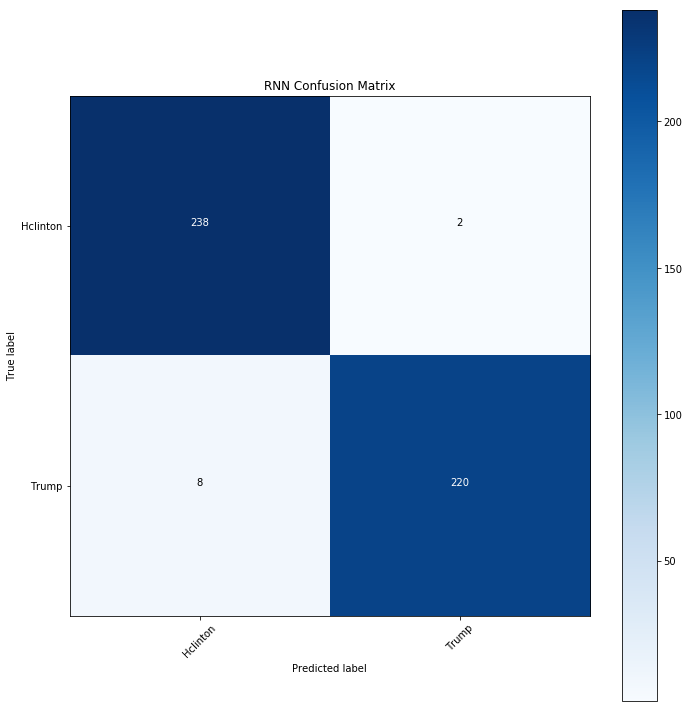

In [37]:
cm = confusion_matrix(actual, preds)
cm_plot_labels = [selections[1].title(), selections[0].title()]

plot_confusion_matrix(cm, cm_plot_labels, normalize=False, title=f'{best.title()}NN Confusion Matrix')

print(f'F1 Score: {f1_score(actual, preds)*100:.2f}%')

In [38]:
preds_df = pd.DataFrame.from_dict({'Predictions': preds, 'Actual': actual})
preds_df = preds_df.join(X_test_text.reset_index(drop=True))
preds_df['Accuracy'] = preds_df['Predictions'] == preds_df['Actual']
preds_df.head()

,Predictions,Actual,text,bigrams,Accuracy
0,1,1,"[a, wall, and, mexico, will, be, paying, for, ...","[wall, mexico, paying, wall, great, crowd, ill...",True
1,0,0,"[bob, gates, who, served, eight, presidents, o...","[bob, gates, served, eight, presidents, 50_yea...",True
2,1,1,"[theres, never, been, the, crowds, theres, nev...","[theres_never, crowds, theres_never, enthusias...",True
3,1,1,"[law, and, order, without, it, we, have, nothi...","[law, order, without, nothing, let, take, oppo...",True
4,0,0,"[i, know, what, we, can, do, together, but, ho...","[know, together, going, pay, well, ill_tell, g...",True


In [39]:
word_counts = {f'{selections[1].title()}_Correct':[], 
               f'{selections[1].title()}_Incorrect':[], 
               f'{selections[0].title()}_Correct':[], 
               f'{selections[0].title()}_Incorrect':[]}

for i in preds_df.index:
    if preds_df.iloc[i]['Actual'] == 0:
        if preds_df.iloc[i]['Accuracy'] == True:
            word_counts[f'{selections[1].title()}_Correct'] += preds_df.iloc[i]['bigrams']
        else:
            word_counts[f'{selections[1].title()}_Incorrect'] += preds_df.iloc[i]['bigrams']
            print(f'{selections[1].title()}:')
            print(' '.join(preds_df.iloc[i]['text']), '\n')
    else:
        if preds_df.iloc[i]['Accuracy'] == True:
            word_counts[f'{selections[0].title()}_Correct'] += preds_df.iloc[i]['bigrams']
        else:
            word_counts[f'{selections[0].title()}_Incorrect'] += preds_df.iloc[i]['bigrams']
            print(f'{selections[0].title()}:')
            print(' '.join(preds_df.iloc[i]['text']), '\n')

Trump:
thank you very much it is a great honor and i am very very grateful being here today in front of so many distinguished people ive met more generals than ive ever seen in my life i like them and they like me a lost endorsements i can tell you my special gratitude to general ashenhurst and general hargett and to each and everyone of you thank you very much thank you guys the national guard of the united states has defended this nation at war kept our citizens safe at home and rushed into danger wherever it has threatened our people our debt to you is eternal yesterday was the 15th anniversary of the 911 attacks the national guard was sent to assist in the aid and recovery and these are serious serious bad days for our country the recovery efforts at ground zero in new york city and i was there and i know what you went through since 911 there have been 780000 members of the national guard deployed overseas including those with multiple deployments right now 10000 members of the nat

In [40]:
# from collections import Counter
# from operator import itemgetter

# # keys = list(word_counts.keys())
# for key in word_counts.keys():
#     top_100 = sorted(Counter(word_counts[key]).items(), key=itemgetter(1), reverse=True)[:100]
#     top_100_df = pd.DataFrame(top_100, columns=['word', 'count'])
#     top_100_df.to_csv(f'{key}_top_100_words.csv')

In [41]:
word_counts = {}

for key in word_index.keys():
    word_counts[key] = {selections[0]: 0, selections[1]: 0}
    
for i in range(preds_df.shape[0]):
    for word in preds_df.iloc[i]['bigrams']:
        selection = selections[1] if preds_df.iloc[i]['Actual'] == 0 else selections[0]
        word_counts[word][selection]+=1
        
word_counts['wall']

{'trump': 24, 'hclinton': 2}

In [42]:
word_counts_df = pd.DataFrame.from_dict(word_counts).T
word_counts_df['difference'] = np.abs(word_counts_df[selections[0]] - word_counts_df[selections[1]])
word_cloud_csv = word_counts_df.sort_values(by='difference', ascending=False)[:100]
word_cloud_csv.to_csv(f'{selections[0]}_{selections[1]}_word_cloud_data.csv')
word_cloud_csv.sum()

hclinton      5976
trump         7154
difference    4764
dtype: int64

In [43]:
word_cloud_csv

,hclinton,trump,difference
going,304,617,313
theyre,32,172,140
great,83,200,117
america,136,31,105
country,162,260,98
people,315,412,97
right,112,207,95
hillary_clinton,1,95,94
work,125,42,83
help,98,19,79
